### Graphing Functions

In [ ]:
try:
    from google.colab import output
    output.enable_custom_widget_manager()
except ModuleNotFoundError:
    pass

!pip install ipympl ipywidgets
%matplotlib widget

import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from matplotlib.widgets import Slider
import numpy as np

In [ ]:
def get_fluxes(mu, ln_q, W, slip, futile):
  sqrt_q = np.exp(ln_q / 2)
  sqrt_Q = np.exp(mu / 2)
  W_mod = np.exp(W / 2)

  F = sqrt_q * sqrt_Q / W_mod
  Ft = sqrt_q / sqrt_Q * W_mod
  B =  1 / sqrt_q * sqrt_Q * W_mod
  Bt = 1 / sqrt_q / sqrt_Q / W_mod
  S = slip / sqrt_q / W_mod
  St = slip / sqrt_q * W_mod
  C = futile / sqrt_q * sqrt_Q
  Ct = futile / sqrt_q / sqrt_Q

  return np.array([F, Ft, B, Bt, S, St, C, Ct])

In [ ]:
# Helper function for creating multi-panel figures.
def create_custom_figure(figsize=(9, 6), rows=2, all_share=True):
    fig = plt.figure(figsize=figsize)
    gs = GridSpec(nrows=rows, ncols=4, width_ratios=[2.5, 1, 2.5, 1], figure=fig)

    # Create the axes and store them in a list
    axes_list = []

    # Create remaining axes with shared y-axis
    for row in range(rows):
        for col in range(4):
            # Add subplot with shared y-axis
            if col == 0 and (not all_share or row == 0):
              ax = fig.add_subplot(gs[row, col])
            else:
              ax = fig.add_subplot(gs[row, col], sharey=axes_list[-1])
            axes_list.append(ax)

    axes = np.array(axes_list).reshape(rows * 2, 2)

    plt.tight_layout()
    return fig, axes

In [ ]:
def draw_bar(ax, x, h, *, bottom=0, c):
    ax.bar(x, h, bottom=bottom, edgecolor="k", color=c)

labels_rotation = [r"$F$", r"$F^+$", r"$B$", r"$B^+$", r"$S$", r"$S^+$"]
labels_fuel = [r"$F$", r"$F^+$", r"$B$", r"$B^+$", r"$C$", r"$C^+$"]
bar_colors = ["#007134", "#7fb799", "#BA0D20", "#dc858f", "#9292C9", "#9292C9"]

def plot_rotation(ax, mu, ln_q, force, slip):
    F, Ft, B, Bt, S, St, C, Ct = get_fluxes(mu, ln_q, force, slip, 0)

    # Draw main bar chart. If no slippage, only draw the first four bars.
    Kr = (F + Bt + S) / (Ft + B + St)
    ax[0].set_title(fr"$K_r = {Kr:.2f}$")
    if S or St:
        ax[0].bar(labels_rotation, [F, Ft, B, Bt, S, St], color=bar_colors, edgecolor="k")
    else:
        ax[0].bar(labels_rotation[:4], [F, Ft, B, Bt], color=bar_colors[:4], edgecolor="k")

    # Draw side bar chart.
    draw_bar(ax[1], "↻", F, c=bar_colors[0])
    draw_bar(ax[1], "↻", Bt, bottom=F, c=bar_colors[3])
    draw_bar(ax[1], "↺", Ft, bottom=B, c=bar_colors[1])
    draw_bar(ax[1], "↺", B, c=bar_colors[2])
    if slip > 0:
        draw_bar(ax[1], "↻", S,  bottom=F+Bt,  c=bar_colors[4])
        draw_bar(ax[1], "↺", St, bottom=B+Ft,  c=bar_colors[5])

    ax[1].set_xticks([0,1], ["↻", "↺"])

def plot_fuel(ax, mu, ln_q, force, futile):
    F, Ft, B, Bt, S, St, C, Ct = get_fluxes(mu, ln_q, force, 0, futile)

    # Draw main bar chart. If no futile cycling, only draw the first four bars.
    if futile > 0:
        ax[0].bar(labels_fuel, [F, Ft, B, Bt, C, Ct], color=bar_colors, edgecolor="k")
    else:
        ax[0].bar(labels_fuel[:4], [F, Ft, B, Bt], color=bar_colors[:4], edgecolor="k")

    # Draw side bar chart
    draw_bar(ax[1], "F->W", F, c=bar_colors[0])
    draw_bar(ax[1], "F->W", B, bottom=F, c=bar_colors[2])
    draw_bar(ax[1], "W->F", Ft, c=bar_colors[1])
    draw_bar(ax[1], "W->F", Bt, bottom=Ft, c=bar_colors[3])
    if C or Ct:
        draw_bar(ax[1], "F->W", C,  bottom=F+B,  c=bar_colors[4])
        draw_bar(ax[1], "W->F", Ct, bottom=Ft+Bt, c=bar_colors[5])
    ax[1].set_xticks([0,1], ["F->W", "W->F"])

In [ ]:
labels_all = [r"$F$", r"$F^+$", r"$B$", r"$B^+$", r"$S$", r"$S^+$", r"$C$", r"$C^+$"]
bar_colors_all = ["#007134", "#7fb799", "#BA0D20", "#dc858f", "#9292C9", "#9292C9", "#9292C9", "#9292C9"]

def plot_all_flux(ax, mu, ln_q, force, slip, futile):
    F, Ft, B, Bt, S, St, C, Ct = get_fluxes(mu, ln_q, force, slip, futile)

    # Draw main bar chart
    ax[0].bar(labels_all, [F, Ft, B, Bt, S, St, C, Ct], color=bar_colors_all, edgecolor="k")

    # Draw side bar chart for rotation
    draw_bar(ax[1], "↻", F, c=bar_colors_all[0])#
    draw_bar(ax[1], "↻", Bt, bottom=F, c=bar_colors_all[3])
    draw_bar(ax[1], "↺", Ft, bottom=B, c=bar_colors_all[1])
    draw_bar(ax[1], "↺", B, c=bar_colors_all[2])
    draw_bar(ax[1], "↻", S,  bottom=F+Bt,  c=bar_colors_all[4])
    draw_bar(ax[1], "↺", St, bottom=B+Ft,  c=bar_colors_all[5])
    ax[1].set_xticks([0,1], ["↻", "↺"])

    # Draw side bar chart for fuel consumption
    draw_bar(ax[2], "F->W", F, c=bar_colors_all[0])
    draw_bar(ax[2], "F->W", B, bottom=F, c=bar_colors_all[2])
    draw_bar(ax[2], "W->F", Ft, c=bar_colors_all[1])
    draw_bar(ax[2], "W->F", Bt, bottom=Ft, c=bar_colors_all[3])
    draw_bar(ax[2], "F->W", C,  bottom=F+B,  c=bar_colors_all[6])
    draw_bar(ax[2], "W->F", Ct, bottom=Ft+Bt, c=bar_colors_all[7])
    ax[2].set_xticks([0,1], ["F->W", "W->F"])

In [ ]:

from scipy.stats import skellam

def draw_hist(ax, fuel, hydro, slip, total):
  F = fuel * hydro * total
  B = (fuel - 1) * (hydro - 1) * total
  S = slip * total

  print(f"q is {F / B :1f}, Gamma is {S / B:1f}")
  print(f"Probability less than 0 is: {skellam.cdf(0, F+S, B+S):1f}")

  x = np.arange(-22, 30)

  # Compute the theoretical Skellam probability density function (PDF)
  pdf = skellam.pmf(x, F + S, B + S)
  ax.step(x, pdf, linewidth=2, where="mid")
  ax.axvline(0, c="k", alpha=0.5)
  ax.axhline(0, c="k", alpha=0.5)

In [ ]:
def calc_rot_flux(rate_constants):
  rF, rH, sF, sH, e, rFt, rHt, sFt, sHt, et = rate_constants

  ML = rF * sF + rF * sHt + rF * et + rHt * sF + rHt * sHt + rHt * et + sHt * e + sF * e

  MR = rFt * et + rFt * sHt + rFt * sF + rH * et + rH * sHt + rH * sF + sH * et + sFt * et

  MS = e * sH + sH * rF + sFt * rF + e * sFt + sH * rHt + sFt * rHt + e * rFt + e * rH

  flux = MR * e - MS * et

  delta = ML + MR + MS

  return ML / delta, MR / delta, MS / delta, flux / delta

In [ ]:
def get_rates(fuel_over_hydro, f_asym, h_asym, e_rate, F, Keq_F, Keq_H):
  rF = 1 * np.ones_like(F)
  rFt = rF / Keq_F
  rH = rF / fuel_over_hydro
  rHt = rH / Keq_H
  sF = rF * f_asym
  sFt = sF / Keq_F
  sH = rH / h_asym
  sHt = sH / Keq_H
  e = e_rate * np.exp(-F/2)
  et = e_rate / np.exp(-F/2)

  return rF, rH, sF, sH, e, rFt, rHt, sFt, sHt, et

### Fig. 2b

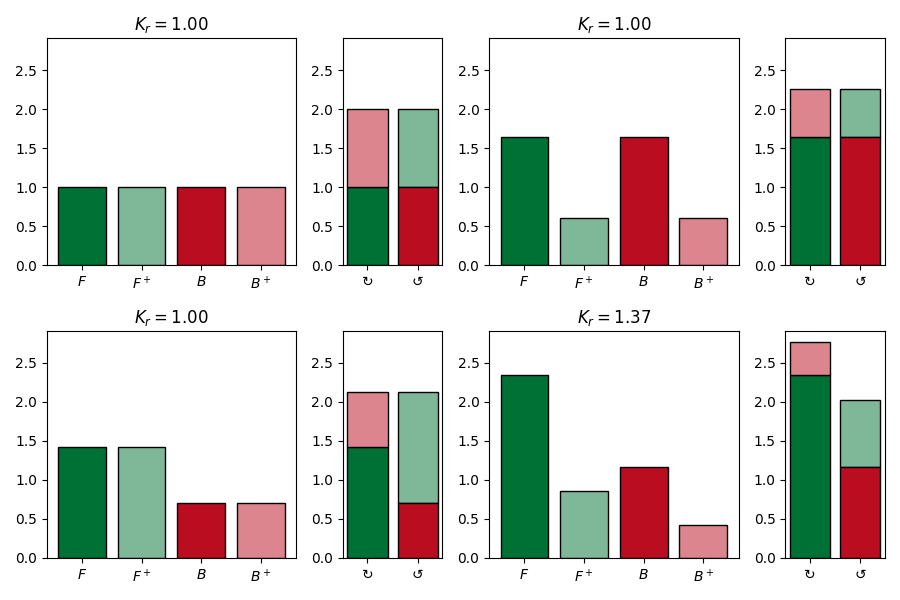

In [ ]:
fig, axes = create_custom_figure()

params = [[0, 0, 0, 0], [1, 0, 0, 0], [0, 0.7, 0, 0], [1, 0.7, 0, 0]]

for ax, param in zip(axes, params):
  plot_rotation(ax, *param)

plt.tight_layout()
plt.show()

### Fig. 3c and 3d

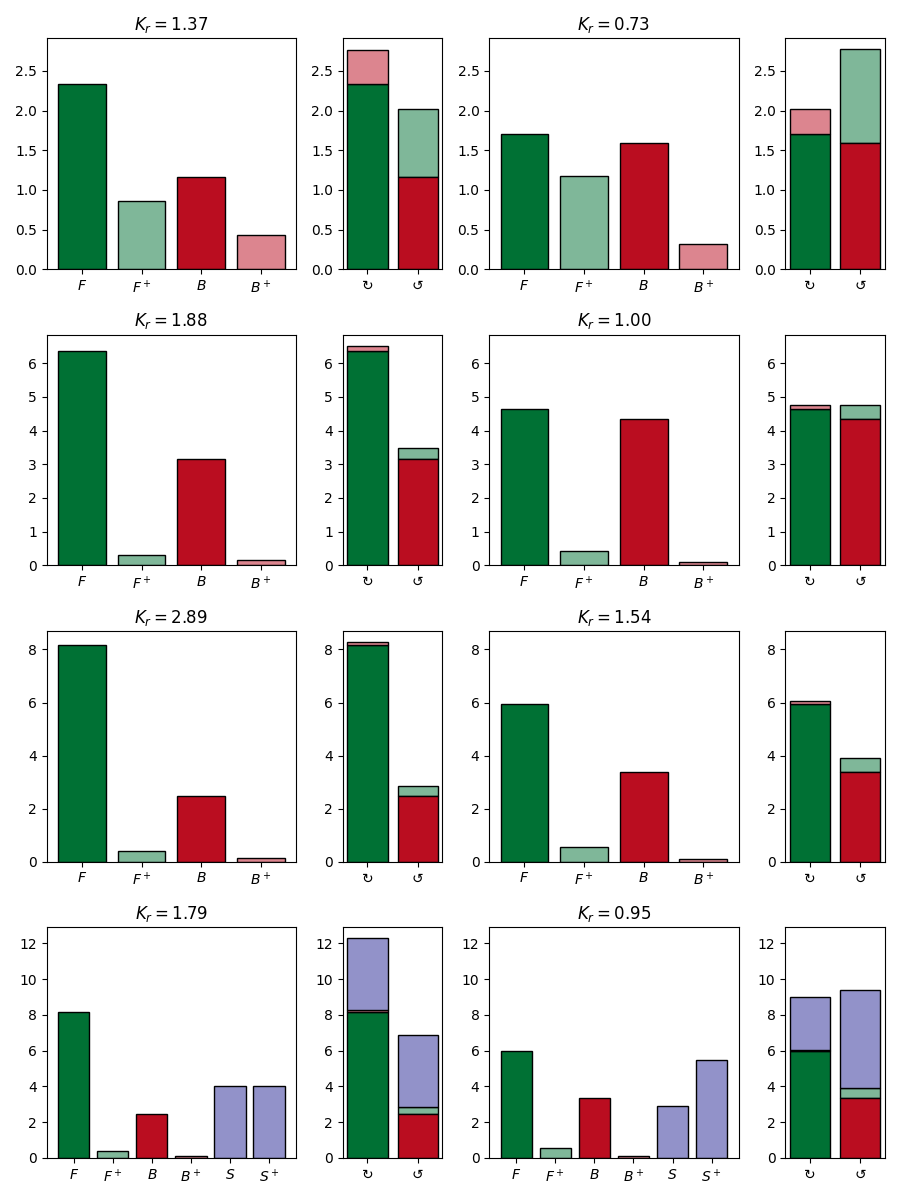

In [ ]:
fig, axes = create_custom_figure(rows=4, figsize=(9, 12), all_share=False)
params = [[1, 0.7, 0, 0], [1, 0.7, 0.63, 0], [3, 0.7, 0, 0], [3, 0.7, 0.63, 0], [3, 1.2, 0, 0], [3, 1.2, 0.63, 0], [3, 1.2, 0, 7.3], [3, 1.2, 0.63, 7.3],]

for ax, param in zip(axes, params):
  plot_rotation(ax, *param)

plt.tight_layout()
plt.show()

### Fig. 4c

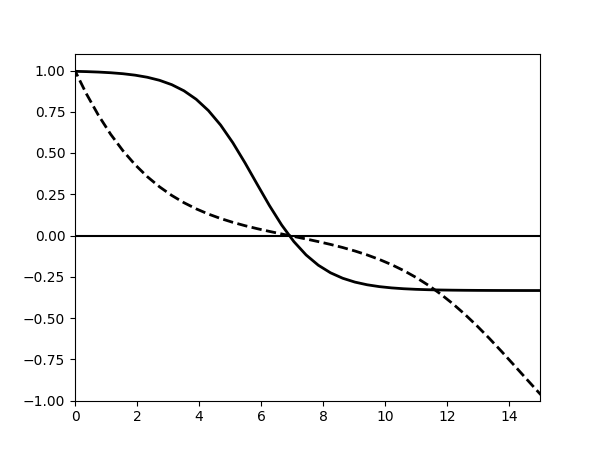

In [ ]:
labels = ["$r_F$", "$r_H$", "$s_F$", "$s_H$", "$e$", "$r_F^+$", "$r_H^+$", "$s_F^+$", "$s_H^+$", "$e^+$"]

F = np.linspace(-15, 24, 100)

rate_constants = get_rates(1, 1e3, 1e3, 0.5, F, 1000, 1000)

ML, MR, MS, rot = calc_rot_flux(rate_constants)

fig, ax = plt.subplots(figsize=(6, 4.5))
plt.plot(F, rot * 5, c="k", linewidth=2, linestyle="dashed")


rate_constants = get_rates(1, 1e3, 1e3, 1e5, F, 1000, 1000)

ML, MR, MS, rot = calc_rot_flux(rate_constants)
plt.plot(F, rot, c="k", linewidth=2)
plt.axhline(0, c="k")

ax.set_xlim(0, 15)
ax.set_ylim(-1, 1.1)

plt.show()

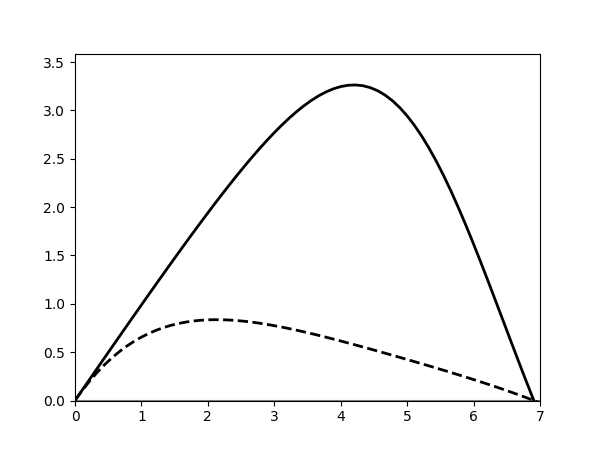

In [ ]:
labels = ["$r_F$", "$r_H$", "$s_F$", "$s_H$", "$e$", "$r_F^+$", "$r_H^+$", "$s_F^+$", "$s_H^+$", "$e^+$"]

F = np.linspace(-1, 10, 100)

rate_constants = get_rates(1, 1e3, 1e3, 0.5, F, 1000, 1000)

ML, MR, MS, rot = calc_rot_flux(rate_constants)

fig, ax = plt.subplots(figsize=(6, 4.5))
plt.plot(F, rot * F * 5, c="k", linewidth=2, linestyle="dashed")

rate_constants = get_rates(1, 1e3, 1e3, 1e5, F, 1000, 1000)

ML, MR, MS, rot = calc_rot_flux(rate_constants)

plt.plot(F, rot * F, c="k", linewidth=2)
plt.axhline(0, c="k", alpha=0.5)

plt.xlim(0, 7)
plt.ylim(0, None)

plt.show()

### Fig. 5b

q is 9.000000, Gamma is 0.000000
Probability less than 0 is: 0.043716
q is 9.000000, Gamma is 10.000000
Probability less than 0 is: 0.181499
q is 9.000000, Gamma is 100.000000
Probability less than 0 is: 0.366347


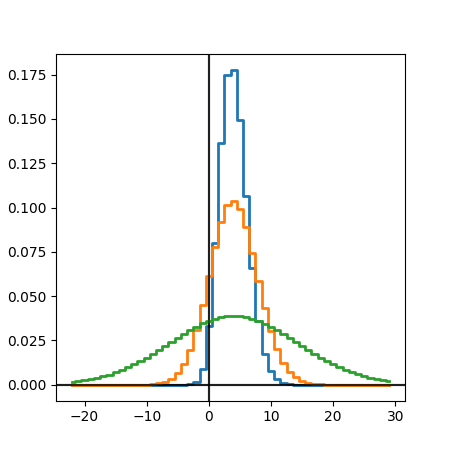

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(4.5, 4.5))

draw_hist(ax, 0.9, 0.5, 0, 10)
draw_hist(ax, 0.9, 0.5, 0.5, 10)
draw_hist(ax, 0.9, 0.5, 5, 10)

plt.show()

### Fig. 5c

q is 9.000000, Gamma is 1.000000
Probability less than 0 is: 0.065632
q is 9.000000, Gamma is 100.000000
Probability less than 0 is: 0.366347


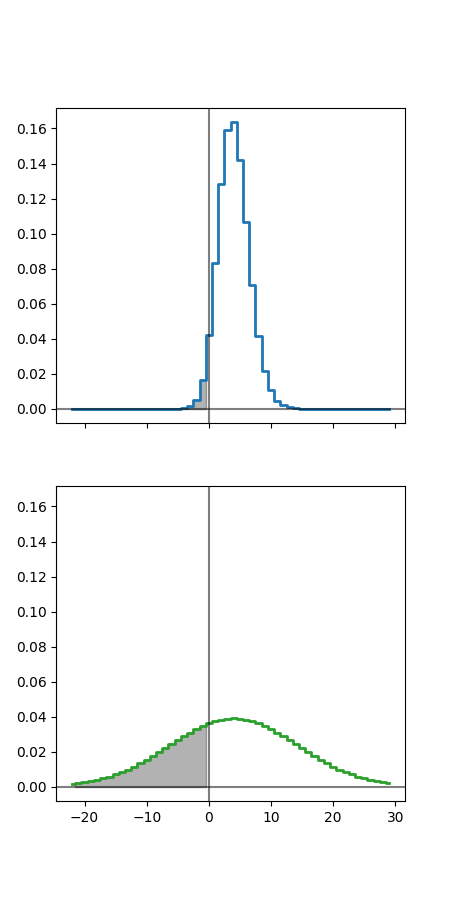

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, sharey=True, figsize=(4.5, 9))

# Draw curves
draw_hist(ax1, 0.9, 0.5, 0.05, 10)
draw_hist(ax2, 0.9, 0.5, 5, 10)

# Shade region below zero
line1 = ax1.get_lines()[0]
x1_data = np.array(line1.get_xdata())
y1_data = np.array(line1.get_ydata())
mask1 = x1_data < 0
ax1.fill_between(x1_data + 0.5, y1_data, 0, where=mask1, alpha=0.3, color='k', step="pre")

line2 = ax2.get_lines()[0]
line2.set_color("tab:green")
x2_data = np.array(line2.get_xdata())
y2_data = np.array(line2.get_ydata())
mask2 = x2_data < 0
ax2.fill_between(x2_data + 0.5, y2_data, 0, where=mask2, alpha=0.3, color='k', step="pre")

plt.show()

### Fig. 6c and 6d

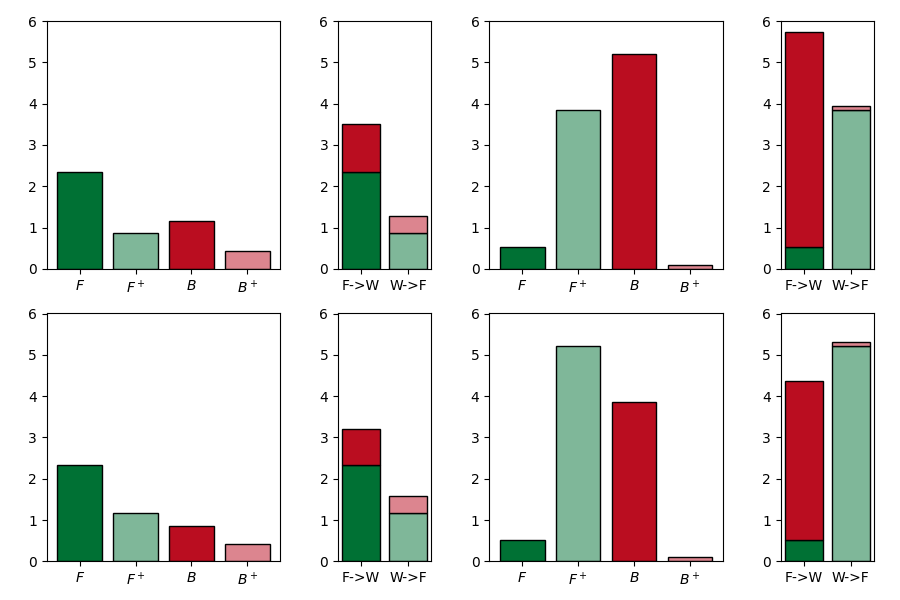

In [ ]:
fig, axes = create_custom_figure()

params = [[1, 0.7, 0, 0], [1, 0.7, 3, 0], [0.7, 1, 0, 0], [0.7, 1, 3, 0]]

for ax, param in zip(axes, params):
  plot_fuel(ax, *param)

plt.show()

### Interactive Bar Charts


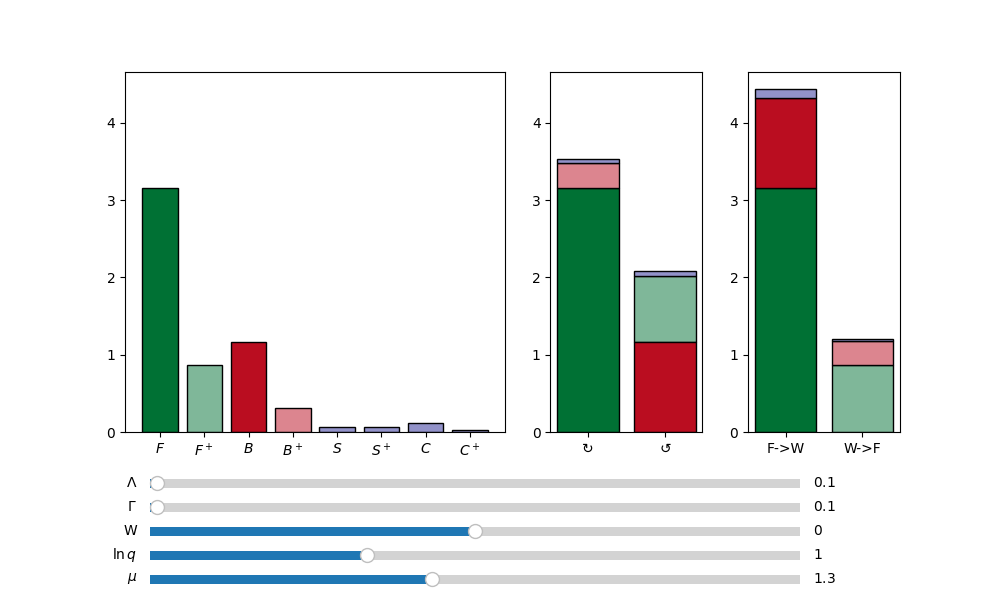

In [ ]:
# ──────────────────────────────────────────────
# 1.  INITIALISE YOUR FIGURE AND FIRST PLOT
# ──────────────────────────────────────────────
fig = plt.figure(figsize=(10, 6))
gs  = GridSpec(nrows=1, ncols=3,
               width_ratios=[2.5, 1, 1], figure=fig)

ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1], sharey=ax1)
ax3 = fig.add_subplot(gs[0, 2], sharey=ax1)
axes = [ax1, ax2, ax3]
fig.subplots_adjust(bottom=0.28)

# Initial values
mu0, ln_q0, force0, slip0, futile0 = 1.3, 1, 0, 0.1, 0.1
plot_all_flux(axes, mu0, ln_q0, force0, slip0, futile0)

# ──────────────────────────────────────────────
# 2.  BUILD THE SLIDER BAR(S)
#     (stacked vertically beneath the plot)
# ──────────────────────────────────────────────
slider_height = 0.03
slider_space  = 0.01
bottom_start  = 0.02            # first slider’s bottom in figure-coords
left, width   = 0.15, 0.65      # x-position / width for all sliders

slider_axes = []
labels      = [r'$\mu$', r'$\ln q$', 'W', '$\Gamma$', '$\Lambda$']
mins        = [0, 0, -3, 0, 0]
maxs        = [ 3,  3,  3, 10, 10]
inits       = [mu0, ln_q0, force0, slip0, futile0]

for i in range(len(labels)):
    bottom = bottom_start + i*(slider_height + slider_space)
    ax_s   = fig.add_axes([left, bottom, width, slider_height])
    slider_axes.append(Slider(ax_s,
                              label=labels[i],
                              valmin=mins[i],
                              valmax=maxs[i],
                              valinit=inits[i],
                              valstep=None))   # continuous

(mu_slider, lnq_slider, force_slider, slip_slider, futile_slider) = slider_axes   # unpack for readability

# ──────────────────────────────────────────────
# 3.  CALLBACK TO RE-DRAW ON SLIDER CHANGE
# ──────────────────────────────────────────────
def update(_):
    # Get current slider values
    mu      = mu_slider.val
    ln_q    = lnq_slider.val
    force   = force_slider.val
    slip    = slip_slider.val
    futile  = futile_slider.val

    # Clear and re-plot
    for ax in axes:
        ax.cla()
    plot_all_flux(axes, mu, ln_q, force, slip, futile)

    fig.canvas.draw_idle()

# Connect every slider to the callback
for s in slider_axes:
    s.on_changed(update)

plt.show()
